In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from astropy.io import fits
BB_data_fname = 'Group_V_BB.dat'
Ne_calib_fname = 'Ne_calib.dat'
fits_file = 'Near-Infrared.fits'


In [2]:
ls

 Aldebaran-10s.fit*                      ExtraSpectra/
'AST 325_326SpectraObservations.docx'*   Flat-1s_01.fit*
 Bias-0001.fit*                          Flat-1s_02.fit*
 Bias-0002.fit*                          Flat-1s_03.fit*
 Bias-0003.fit*                          Group_V_BB.dat
 Capella-10s.fit*                        lab02_analysis_code.ipynb
 Dark-0001_10s.fit*                      Lecture_5_Lab2_AST325-326-2022Fall.pdf
 Dark-0001_1s.fit*                       Mahasim-THeta-Aur-10s.fit*
 Dark-0001_8s.fit*                       MasterSpectraSet.zip
 Dark-0002_10s.fit*                      Moon-1s.fit*
 Dark-0002_1s.fit*                       MoonGuideImage2.fit*
 Dark-0002_8s.fit*                       Near-Infrared.fits
 Dark-0003_10s.fit*                      Ne_calib.dat
 Dark-0003_1s.fit*                       Neon-8s.fit*
 Dark-0003_8s.fit*                       NeonArgonSource.png*
 Elnath-betaTau-10s.fit*


In [3]:
# load and intialize data for BB
BB_data = np.genfromtxt(fname=BB_data_fname)
BB_pix = np.linspace(0,len(BB_data), len(BB_data))
Ne_calib_data = np.genfromtxt(fname= Ne_calib_fname )

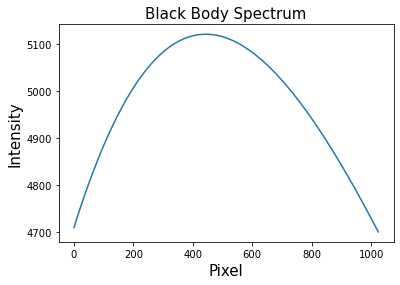

In [4]:
fs = 15
plt.title('Black Body Spectrum', fontsize=fs)
plt.xlabel('Pixel', fontsize=fs)
plt.ylabel('Intensity', fontsize=fs)
#plt.tick(fontsize=15)
plt.plot(BB_pix, BB_data)

Text(0, 0.5, 'Intensity')

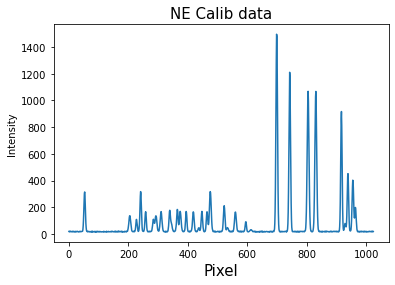

In [5]:
plt.plot(BB_pix, Ne_calib_data)
plt.title('NE Calib data', fontsize = fs )
plt.xlabel('Pixel', fontsize=fs)
plt.ylabel('Intensity')

In [6]:
# known NE spectrum points, in order of of luminsoity 
Ne_nm = np.asarray([540.056, 585.249, 640.225,
                    692.947, 703.241, 717.394,
                    724.512, 743.890, 748.887, 753.577, ])

# in order to find the corresponding wavelengths, we need to fit centroids onto the peaks in the data
# then use the most luminouius peaks as the corresponding wavelengths

# use scipy find peaks 
Ne_peaks, _ = find_peaks(Ne_calib_data, height=(250, None)) # heights adjusted to get the same n
                                                            # as test points
            

Ne_peak_wl = Ne_calib_data[Ne_peaks]


In [7]:
len(Ne_peaks)

10

Text(0, 0.5, 'Intensity')

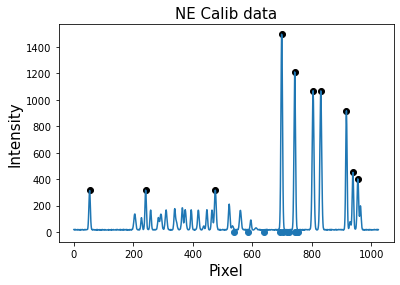

In [8]:
plt.plot(BB_pix, Ne_calib_data)
plt.scatter(BB_pix[Ne_peaks], Ne_calib_data[Ne_peaks], color='k')
plt.scatter(Ne_nm,np.ones(len(Ne_nm)))
plt.title('NE Calib data', fontsize = fs )
plt.xlabel('Pixel', fontsize=fs)
plt.ylabel('Intensity', fontsize=fs)


In [9]:
# fitting NE spectrum points to NE calibration
# assuming true relationship is y = mx + c where x is pixel and y is the wavelength 

def pix_to_wl(x, m, c):
    y = m*x + c
    return y

# perfom fitt
popt, pcov = curve_fit(f=pix_to_wl, xdata=Ne_peaks, ydata=Ne_nm)
m = popt[0]
c = popt[1]

# calculate error in fit
print(m)
std_m = (2.05955614e-07*1.08921996e-01 ) **0.5
print(std_m)

0.23610348228429281
0.00014977682252032703


Text(0, 0.5, 'Wavelength (nm)')

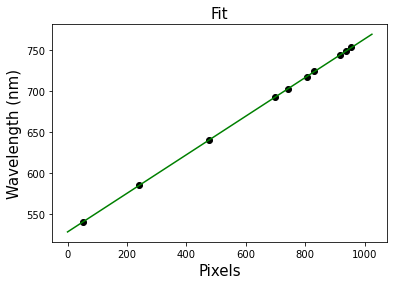

In [10]:
xdata = Ne_peaks
ydata = Ne_nm
plt.scatter(xdata, ydata, color='k')
plt.plot(BB_pix, pix_to_wl(BB_pix, m, c), color='green')
plt.title('Fit', fontsize=fs)
plt.xlabel('Pixels', fontsize=fs)
plt.ylabel('Wavelength (nm)',fontsize=fs)
#plt.ylim(ymin=0)
#plt.xlim(xmin=0)

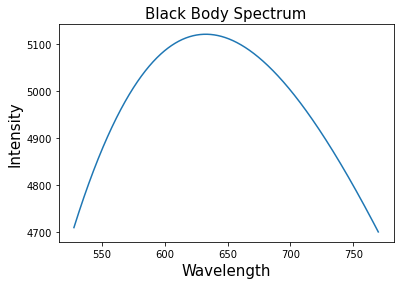

In [11]:
fs = 15
plt.title('Black Body Spectrum', fontsize=fs)
plt.xlabel('Wavelength', fontsize=fs)
plt.ylabel('Intensity', fontsize=fs)
#plt.tick(fontsize=15)
plt.plot(pix_to_wl(BB_pix, m, c), BB_data)

## part 2

In [12]:
# read in data 
with fits.open(fits_file) as hdul:
    hdul.info()
    fits_data = hdul[0].data

Filename: Near-Infrared.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     206   (256, 256, 1)   int32   


In [13]:
np.shape(fits_data)

new_fits = np.empty((256,256))
new_fits= fits_data[0,:,:]
np.shape(new_fits)

(256, 256)

Text(0, 0.5, 'Spectral Direction')

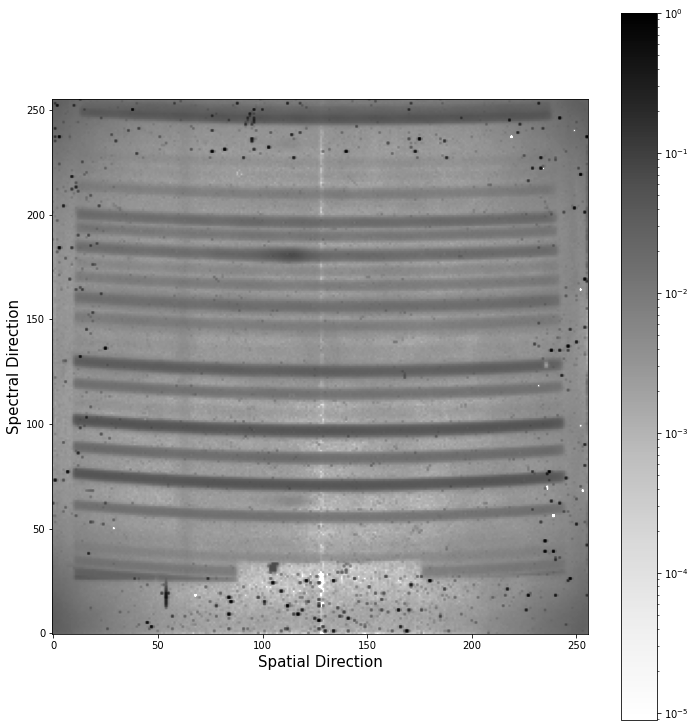

In [14]:
# plot
#from astropy.visualization import astropy_mpl_style
from matplotlib.colors import LogNorm
#plt.style.use(astropy_mpl_style)

plt.figure(figsize=(12,13))
plt.imshow(new_fits/ np.max(new_fits), cmap= 'Greys', 
           norm=LogNorm(), origin="lower") #p/#lasma')#'gray')
plt.colorbar()
plt.xlabel('Spatial Direction', fontsize=fs)
plt.ylabel('Spectral Direction', fontsize=fs)

12


Text(0, 0.5, 'Intensity')

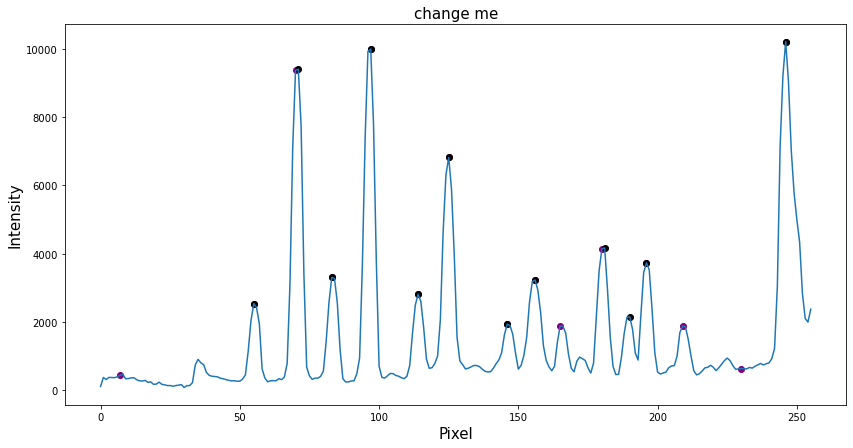

In [16]:
# need to ID and fit for OH lines
OH_wl = np.asarray([ 16235.376, 16128.608, 16350.650,16502.365, 16442.155]) # in asntrom


# we want to slie the data

fits_slice = new_fits[:,135:150]
#plt.figure(figsize=(12,13))
#plt.imshow(fits_slice/ np.max(fits_slice), cmap= 'Greys', 
     #      norm=LogNorm(), origin="lower") #p/#lasma')#'gray')
#plt.show()

# make median of data
spectrum_fits = np.empty(len(fits_slice[:,0]))

for i in range(len(spectrum_fits)):
    spectrum_fits[i] = np.median(fits_slice[i,:])
    
#peak find 
OH_peaks, _ = find_peaks(spectrum_fits, height=(1900, None)) # heights adjusted to get the same n
                                                            # as test points
#print('peaks', len(OH_wavelengths))

OH_peak_wl = spectrum_fits[OH_peaks]

OH_wavelengths = np.array([16128.608,16194.615,16235.376,16341.755,16350.650,16414.737,16442.155,16447.616,16502.635,16553.814,16609.994,16702.639])

pixels_section_sep = np.array([7,55,70,83,97,114,125,146,156,165,180,196,209,230,246])

pixel_peaks = np.arange(256)[OH_peaks]
    
print(len(OH_wavelengths))
# plot
plt.figure(figsize=(14,7))
plt.plot(np.arange(256),spectrum_fits)
plt.scatter(np.arange(256)[pixels_section_sep], spectrum_fits[pixels_section_sep], color='purple')
plt.scatter(np.arange(256)[OH_peaks], spectrum_fits[OH_peaks], color ='k')
plt.title('change me', fontsize = fs )
plt.xlabel('Pixel', fontsize=fs)
plt.ylabel('Intensity', fontsize=fs)

    

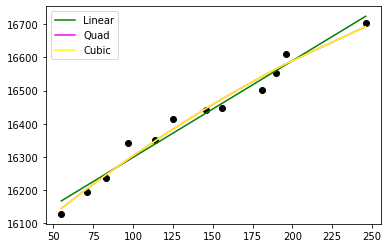

In [17]:
# fitting OH spectrum points to OH calibration
# assuming true relationship is y = mx + c where x is pixel and y is the wavelength 


plt.scatter(pixel_peaks,OH_wavelengths, color='k')

def lin(x, m, c):
    y = m*x + c
    return y

def quad(x, m1, m2, c):
    return m1 * x**2 + m2*x**1 + c

def cubic(x, m1, m2, m3, c):
    return m1 * x**2 + m2*x**1 + m3*x**2 + c

# perfom  lin fit
popt, pcov = curve_fit(f=lin, xdata=pixel_peaks, ydata=OH_wavelengths)
m = popt[0]
c = popt[1]

plt.plot(pixel_peaks, lin(pixel_peaks, m, c), color='green', label='Linear')

# quad
popt, pcov = curve_fit(f=quad, xdata=pixel_peaks, ydata=OH_wavelengths)
m1 = popt[0]
m2 = popt[1]
c = popt[-1]

plt.plot(pixel_peaks, quad(pixel_peaks, m1, m2, c), color='magenta', label='Quad')


# cubic
popt, pcov = curve_fit(f=cubic, xdata=pixel_peaks, ydata=OH_wavelengths, )
m1 = popt[0]
m2 = popt[1]
m3 = popt[2]
c = popt[-1]

plt.plot(pixel_peaks, cubic(pixel_peaks, m1, m2, m3, c), color='Yellow', label='Cubic')



plt.legend()
# calculate error in fit
#print(m)
#std_m = (2.05955614e-07*1.08921996e-01 ) **0.5
#print(std_m)

In [ ]:
# determine redshift and speed

In [ ]:
# part 3
